In [2]:
!pwd

/home/oleg/projects/ML/Pretrain YOLO LightlyTrain


In [ ]:
Pretrain a YOLO model from Scratch with LightlyTrain

https://github.com/lightly-ai/lightly-train

https://www.youtube.com/watch?v=oBRWtxbK8D8

https://www.lightly.ai/lightly-train

https://colab.research.google.com/github/lightly-ai/lightly-train/blob/main/examples/notebooks/quick_start.ipynb

https://docs.lightly.ai/train/stable/index.html

In [3]:
from ultralytics import settings

print(settings["datasets_dir"])

/home/oleg/projects/18_task/datasets


In [1]:
from ultralytics.data.utils import check_det_dataset

dataset = check_det_dataset("VOC.yaml")


WARNING ⚠️ Dataset 'VOC.yaml' images not found, missing path '/home/oleg/projects/18_task/datasets/VOC/images/test2007'
Unzipping /home/oleg/projects/18_task/datasets/VOC/images/VOCtrainval_06-Nov-2007.zip to /home/oleg/projects/18_task/datasets/VOC/images/VOCdevkit...: 100% ━━━━━━━━━━━━ 10945/10945 4.9Kfiles/s 2.2s<0.0s7
Unzipping /home/oleg/projects/18_task/datasets/VOC/images/VOCtest_06-Nov-2007.zip to /home/oleg/projects/18_task/datasets/VOC/images/VOCdevkit...: 100% ━━━━━━━━━━━━ 10357/10357 4.6Kfiles/s 2.2s0.0ss<2:15
Unzipping /home/oleg/projects/18_task/datasets/VOC/images/VOCtrainval_11-May-2012.zip to /home/oleg/projects/18_task/datasets/VOC/images/VOCdevkit...: 100% ━━━━━━━━━━━━ 40189/40189 6.3Kfiles/s 6.4s<0.0s
train2012: 100% ━━━━━━━━━━━━ 5717/5717 12.4Kit/s 0.5s.1s
val2012: 100% ━━━━━━━━━━━━ 5823/5823 11.5Kit/s 0.5s.0s
train2007: 100% ━━━━━━━━━━━━ 2501/2501 3.2Kit/s 0.8s0.1s
val2007: 100% ━━━━━━━━━━━━ 2510/2510 3.1Kit/s 0.8s0.1s
test2007: 100% ━━━━━━━━━━━━ 4952/4952 3.2Kit

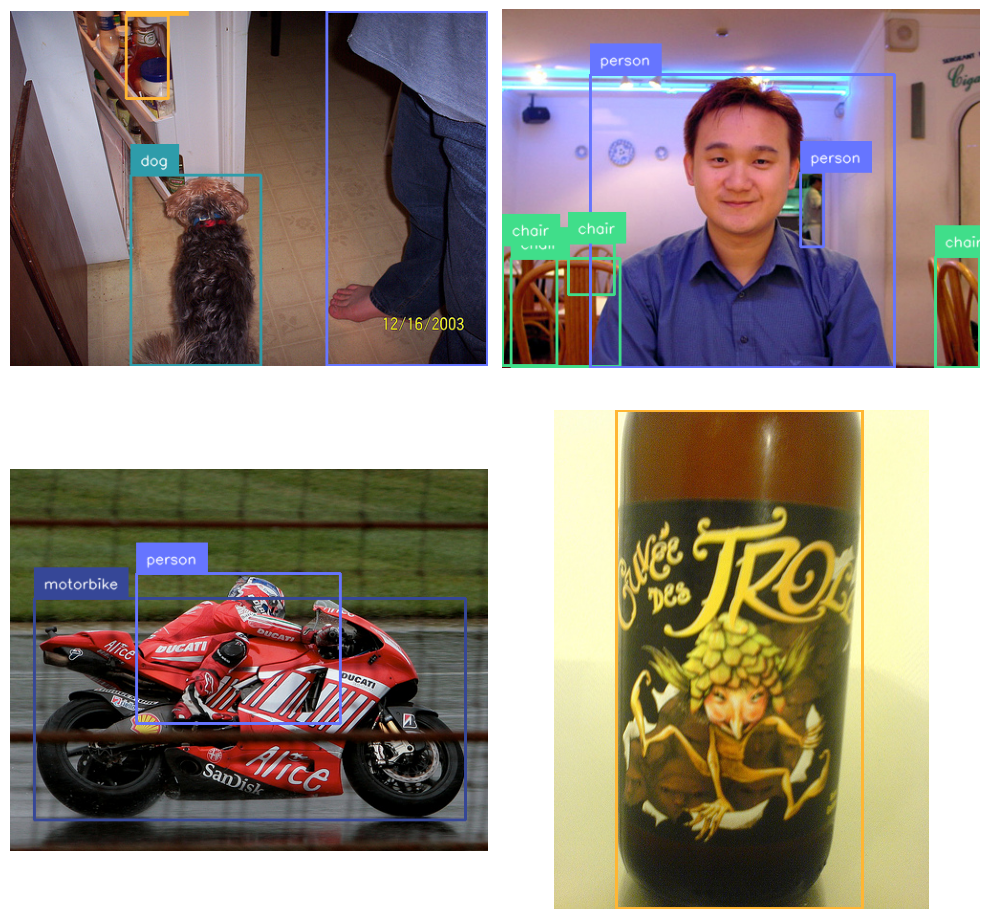

In [5]:
import random

import matplotlib.pyplot as plt
import supervision as sv
import yaml
from ultralytics import settings
from ultralytics.data.utils import check_det_dataset

dataset = check_det_dataset("VOC.yaml")

detections = sv.DetectionDataset.from_yolo(
    data_yaml_path=dataset["yaml_file"],
    images_directory_path=f"{settings['datasets_dir']}/VOC/images/train2012",
    annotations_directory_path=f"{settings['datasets_dir']}/VOC/labels/train2012",
)

with open(dataset["yaml_file"], "r") as f:
    data = yaml.safe_load(f)

names = data["names"]

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()

detections = [detections[random.randint(0, len(detections))] for _ in range(4)]

for i, (path, image, annotation) in enumerate(detections):
    annotated_image = box_annotator.annotate(scene=image, detections=annotation)
    annotated_image = label_annotator.annotate(
        scene=annotated_image,
        detections=annotation,
        labels=[names[elem] for elem in annotation.class_id],
    )
    ax[i].imshow(annotated_image[..., ::-1])
    ax[i].axis("off")

fig.tight_layout()
fig.show()

In [9]:
from ultralytics import YOLO

# Load the exported model.
model = YOLO("yolo11n.yaml")

# Fine-tune with ultralytics.
model.train(data="VOC.yaml", epochs=5, project="logs/voc_yolo11s", name="from_scratch")

New https://pypi.org/project/ultralytics/8.3.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VOC.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=from_scratch3, nbs=64, nms=False, opset=

Exception in thread Thread-61 (_pin_memory_loop):
Traceback (most recent call last):
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-package

KeyboardInterrupt: 

In [ ]:
# finetune_yolo.py

from ultralytics import YOLO

if __name__ == "__main__":
    # Load the exported model.
    model = YOLO("out/coco_minitrain_pretrain/exported_models/exported_last.pt")

    # Fine-tune with ultralytics.
    model.train(data="VOC.yaml", epochs=30, project="logs/voc_yolo11s", name="from_pretrained")